<a href="https://colab.research.google.com/github/sweetyjunnarkar/Corona-tweet-sentiments/blob/main/Sweety_Junnarkar_Team_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
working_file="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Coronavirus Tweets.csv"

In [ ]:
df = pd.read_csv(working_file,encoding = 'latin')

In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


So we can see the null values from the location feature

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


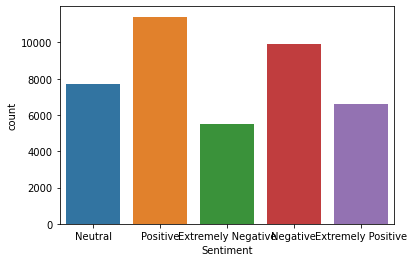

In [ ]:
sns.countplot(df["Sentiment"])

In [ ]:
df[df['Sentiment']=="Positive"].loc[3,"OriginalTweet"]

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

We can see that the above tweet is positive because it is the positive thing happened due to corona. Or in this tweet we are seeing lot of positivity.

In [ ]:
df[df['Sentiment']=="Extremely Positive"].loc[11,"OriginalTweet"]

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [ ]:
df[df['Sentiment']=="Extremely Positive"].loc[41142,"OriginalTweet"]

'@MajangChien @MTNSSD @MTNSSD is worst than COVID-19. All businesses have reduced their prices but our MTN is looting us instead of giving us free data.'

In [ ]:
df[df['Sentiment']=="Neutral"].loc[10,"OriginalTweet"]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [ ]:
df[df['Sentiment']=="Neutral"].loc[16,"OriginalTweet"]

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

We can definitely relate why it is neutral...!!!

In [ ]:
df[df['Sentiment']=="Extremely Negative"].loc[27,"OriginalTweet"]

'This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂ\x92m doing ???? No panic. https://t.co/Lg7HVMZglZ'

In [ ]:
df[df['Sentiment']=="Extremely Negative"].loc[41130,"OriginalTweet"]

'Squeo works in the meat department of a Kroger supermarket in Michigan. He knows of several grocery workers whoÂ\x92ve tested positive for COVID-19 and one in his area who died. He worries that the behavior of some shoppers is putting people in unnecessary danger.'

In [ ]:
df[df['Sentiment']=="Negative"].loc[9,"OriginalTweet"]

"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"

From above tweets we can relate to what is positive,extremely positive,extremely negative and negative.

Lets analyze other features:

In [ ]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

We can see that most of the tweets are from the month march and april where corona just started spreding.

In [ ]:
df[df['TweetAt']=='28-03-2020']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
24948,28747,73699,Sydney,28-03-2020,.@Woolworths is set to expand its community sh...,Positive
24949,28748,73700,NaN,28-03-2020,@JackPosobiec Test kits with low accuracy but ...,Negative
24950,28749,73701,NaN,28-03-2020,"NSW, Australia. COVID-19 positive Chinese wom...",Extremely Positive
24951,28750,73702,"New Delhi, India",28-03-2020,1 A friend is helping with relief across India...,Extremely Positive
24952,28751,73703,"New Hampshire, USA",28-03-2020,My story about how grocery stores and their wo...,Negative
24953,28752,73704,A Hesse in MUC and CGN & DUS,28-03-2020,Protected shopping with my wife during the #Co...,Extremely Positive
24954,28753,73705,"Chesterfield, VA",28-03-2020,#Coronavirus: Italy becoming impatient with lo...,Extremely Negative
24955,28754,73706,RÃ©publique DÃ©mocratique Du Congo,28-03-2020,@mundaditob @marosephine @senatrdc @VoilaNight...,Extremely Positive
24956,28755,73707,Toronto,28-03-2020,So you want to limit trips to the grocery stor...,Positive
24957,28756,73708,"Victoria, Australia",28-03-2020,"When all this is over, IÂll never again take ...",Extremely Positive


In [ ]:
df[df['TweetAt']=='30-03-2020']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
25096,28895,73847,"England, United Kingdom",30-03-2020,"""Frontline staff work upto 14hrs""\r\r\n\r\r\n""...",Positive
25097,28896,73848,NaN,30-03-2020,"No matter what you talk about, the conversatio...",Extremely Negative
25098,28897,73849,"Adelaide, South Australia",30-03-2020,The @UN has been forced to issue a Âbattle pl...,Extremely Negative
25099,28898,73850,India,30-03-2020,#Covid2019 | Demand for existing residential s...,Negative
25100,28899,73851,NaN,30-03-2020,The supermarket is full of people It seems tha...,Positive
...,...,...,...,...,...,...
25178,28977,73929,NaN,30-03-2020,@MOPHQatar @MOI_QatarEn @ILQLive Limit the amo...,Extremely Positive
25179,28978,73930,Earth,30-03-2020,"@realDonaldTrump Why do you keep saying ""if yo...",Negative
25180,28979,73931,Jakarta,30-03-2020,You know shit is real when the supermarket is ...,Negative
25181,28980,73932,NaN,30-03-2020,At the best of times I canÂt stand anyone nea...,Extremely Positive


In [ ]:
df['Location'].value_counts()

London                       540
United States                528
London, England              520
New York, NY                 395
Washington, DC               373
                            ... 
Munsyari, India                1
Twentynine Palms Base, CA      1
CountrY BoY                    1
on the shoreline, ct           1
Watkinsville, GA               1
Name: Location, Length: 12220, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

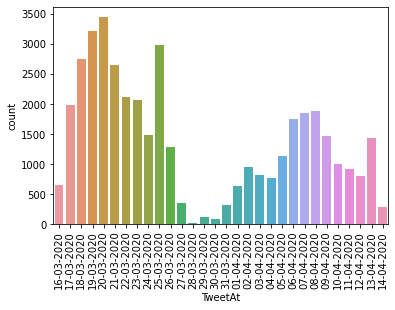

In [ ]:
sns.countplot(df['TweetAt'])
plt.xticks(rotation = 90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

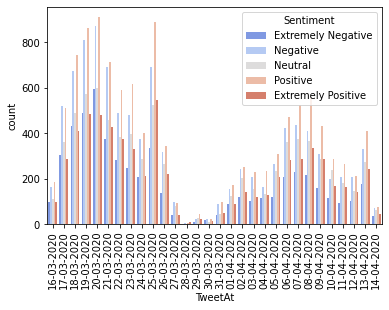

In [ ]:
sns.countplot(df['TweetAt'],hue = df['Sentiment'],hue_order=[ 'Extremely Negative', 'Negative','Neutral', 'Positive','Extremely Positive'],palette = 'coolwarm')
plt.xticks(rotation = 90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

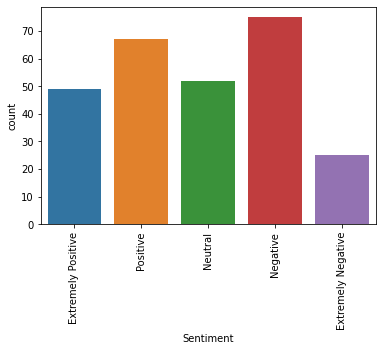

In [ ]:
sns.countplot(df[df['Location']=="India"]['Sentiment'])
plt.xticks(rotation = 90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

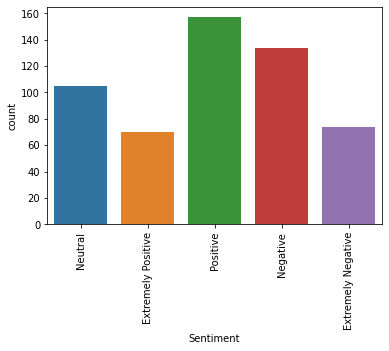

In [ ]:
sns.countplot(df[df['Location']=="London"]['Sentiment'])
plt.xticks(rotation = 90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

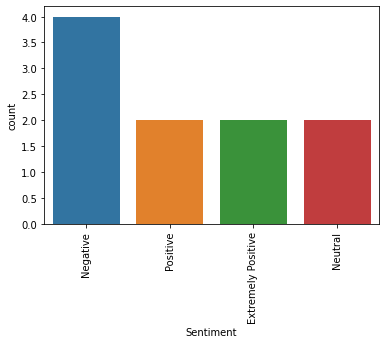

In [ ]:
sns.countplot(df[df['Location']=="China"]['Sentiment'])
plt.xticks(rotation = 90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

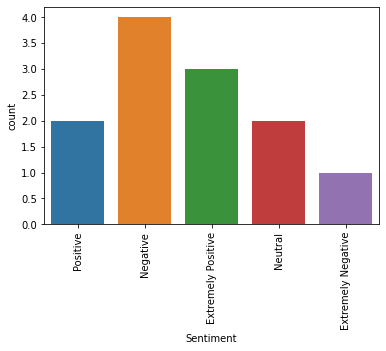

In [ ]:
sns.countplot(df[df['Location']=="US"]['Sentiment'])
plt.xticks(rotation = 90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

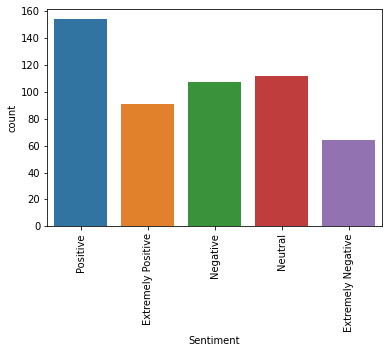

In [ ]:
sns.countplot(df[df['Location']=="United States"]['Sentiment'])
plt.xticks(rotation = 90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

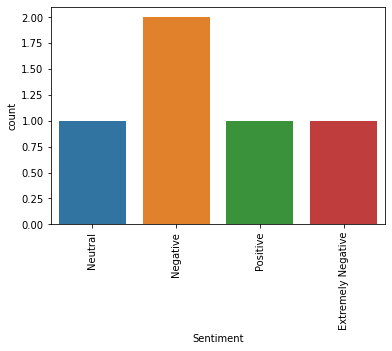

In [ ]:
sns.countplot(df[df['Location']=="Austria"]['Sentiment'])
plt.xticks(rotation = 90)

In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
#@title NLTK and String Import
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.shape

(41157, 6)

In [ ]:
df.loc[np.random.randint(0,40000)]

UserName                                                     41419
ScreenName                                                   86371
Location                                            Washington, DC
TweetAt                                                 10-04-2020
OriginalTweet    Louisiana church expecting 2,000 at Easter ser...
Sentiment                                                 Positive
Name: 37620, dtype: object

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
pun = string.punctuation

In [ ]:
pun = pun.replace('#','')

In [ ]:
pun

'!"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def rem_pun(tweet):
  stri = ''
  for i in tweet:
    if i not in pun:
      stri+=i
    else:
      stri+=' '
  return stri

In [ ]:
def rm_links(tweet):
  a=[]
  for word in tweet.split():
    if word.startswith('https:') or word.startswith('http:'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [ ]:
def get_tags(tweet):
  stri = ''
  for word in tweet.lower().split():
    if word.startswith("#") and len(word)>2:
      stri+=word[1:]+','
  return stri[:-1]

In [ ]:
def rm_sw(tweet):
  a= []
  sw = stopwords.words('english')
  for word in tweet.lower().split():
    if word.startswith('#') and len(word)<3:
      continue
    if word not in sw:
      a.append(word)
  return ' '.join(a)

In [ ]:
def strip_ly(tweet):
  a=[]
  suffix="ly"
  for word in tweet.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

In [ ]:
def strip_ing(tweet):
  a=[]
  suffix="ing"
  for word in tweet.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

In [ ]:
def strip_ed(tweet):
  a=[]
  suffix="ed"
  for word in tweet.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

In [ ]:
df['filtered_tweets'] = df['OriginalTweet'].apply(rm_links).apply(lambda x :  x.replace('\r','').replace('\n',''))

In [ ]:
df["get_suff"]=df['filtered_tweets'].apply(strip_ing).apply(strip_ly).apply(strip_ed)

In [ ]:
df["get_suff"].iloc[8]

'due covid-19 our retail store and classroom atlanta will not open for walk-in business classes for the next two weeks, beginn monday, march 16. will continue process online and phone orders normal! thank you for your understanding!'

In [ ]:
df['filtered_tweets'].iloc[8]

'Due COVID-19 our retail store and classroom Atlanta will not open for walk-in business classes for the next two weeks, beginning Monday, March 16. will continue process online and phone orders normal! Thank you for your understanding!'

In [ ]:
df["get_suff"].iloc[8]

'due covid-19 our retail store and classroom atlanta will not open for walk-in business classes for the next two weeks, beginn monday, march 16. will continue process online and phone orders normal! thank you for your understanding!'

In [ ]:
df['filtered_tweets'] = df['filtered_tweets'].apply(rem_pun).apply(strip_ing).apply(strip_ly).apply(strip_ed)

In [ ]:
df['hashtags'] = df['filtered_tweets'].apply(get_tags).apply(strip_ing).apply(strip_ly).apply(strip_ed)

In [ ]:
df.loc[37029]

UserName                                                       40828
ScreenName                                                     85780
Location                                                New York, NY
TweetAt                                                   10-04-2020
OriginalTweet      This piece from @reuters talks about inflation...
Sentiment                                         Extremely Negative
filtered_tweets    this piece from reuters talks about inflation ...
hashtags                                                 coronavirus
get_suff           this piece from @reuters talks about inflation...
words              piece reuters talks inflation overall componen...
Name: 37029, dtype: object

In [ ]:
df['words'] = df['filtered_tweets'].apply(rm_sw).apply(strip_ing).apply(strip_ly).apply(strip_ed)

In [ ]:
r = np.random.randint(0,40000)
a,b,c = df.loc[r,['words','hashtags','OriginalTweet']]

In [ ]:
print(f'Words:{a}\nHashtags:{b}\nOT:{c}')

Words:wwd covid 19 retail store closures
Hashtags:
OT:WWD - COVID-19 Retail Store Closures https://t.co/u1UPPhWiVT https://t.co/guWi8fMjmM


In [ ]:
df['hashtags'].value_counts()

                                                                                                  17476
coronavirus                                                                                        3359
covid                                                                                               853
covid2019                                                                                           420
coronavirus,covid19                                                                                 350
                                                                                                  ...  
uklockdown,staysafestayhome,keyworkers,coronavirus,coronavirusoutbreak,covid19,covid19uk,covid        1
shelterinplace,coronacrisis,quarantine                                                                1
rqcomm201csuf,coronavirus                                                                             1
wereinthistogether,covid19uk,coronavirus                        

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer_hashtag = TfidfVectorizer(min_df = 5,ngram_range=(2,2),analyzer="word")
vectorizer_words  = TfidfVectorizer( min_df= 10,ngram_range=(2,2),analyzer="word")

In [ ]:
X_hashtags = vectorizer_hashtag.fit_transform(df['hashtags'])

In [ ]:
X_words = vectorizer_words.fit_transform(df['words'])

In [ ]:
hash_df= pd.DataFrame(data=X_hashtags.toarray(), columns=vectorizer_hashtag.get_feature_names())
word_df= pd.DataFrame(data=X_words.toarray(), columns=vectorizer_words.get_feature_names())

In [ ]:
hash_df

,ad instock,afterhours davido,agenparl coronavirus,ai seo,alert giveawayalert,amazon coronavirus,amazon covid,amazon dropshipp,asda morrisons,asda tesco,auspol coronavirus,australia covid19,bidet comedy,bitcoin digital,blockchain amazon,blockchain crypto,brand analytics,break coronavirus,bushcraft rt,business businessnews,business consumer,business coronavirus,business covid19,calgary yyc,california coronavirus,calockdown stophoard,canada coronavirus,cbd coronavirus,cdnpoli onpoli,charmin toiletpaper,china china,china coronavirus,china covid,china ita,chinavirus coronavirus,chinesevirus coronavirus,chloroquine coronavirus,coins dollar,comedy hotchick,commodities coronavirus,...,toiletpapercrisis covid,toiletpapercrisis toiletpaper,toiletpapercrisis toiletpaperapocalypse,toiletpapercrisis toiletpaperchallenge,toiletpapercrisis toiletpaperpanic,toiletpaperemergency coronavirus,toiletpaperpanic coronavirus,toiletpaperpanic toiletpaper,toiletpaperpanic toiletpaperapocalypse,toiletpaperpanic toiletpapercrisis,toiletpaperpanic toiletpaperemergency,toronto coronavirus,tp coronavirus,tp toiletpaper,trends coronavirus,trump coronavirus,trump wuhan,uk coronavirus,uklockdown coronavirus,uklockdown covid,us coronavirus,usa coronavirus,usa covid,usa trump,virus coronavirus,virus covid,virus covid19,virus pandemic,walmart coronavirus,washhand sanitizer,washyourhands coronavirus,washyourhands covid,washyourhands sanitizer,webinar coronavirus,workstream hr,wuhan coronavirus,wuhan healthy,wuhanvirus coronavirus,yeg coronavirus,ynwa covid19nigeria
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
word_df

,000 000,000 employees,000 food,000 help,000 masks,000 new,000 people,000 tonnes,000 workers,10 000,100 000,100 crore,100 people,100 per,18 year,19 affect,19 also,19 amp,19 business,19 case,19 cases,19 caus,19 chang,19 changes,19 concerns,19 consumer,19 continues,19 corona,19 coronacrisis,19 coronacrisisuk,19 coronavirus,19 coronavirusoutbreak,19 coronaviruspandemic,19 coronavirusuk,19 coronavirusupdate,19 could,19 covid,19 covid19,19 covid19uk,19 covid2019,...,worse covid,worst case,worth food,would br,would expect,would get,would good,would great,would help,would like,would love,would make,would never,would nice,would rather,would see,would stop,would take,would thought,would want,wrong people,wtf wrong,wuhan grocery,year 2020,year due,year low,year lows,year old,year year,years ago,years coronavirus,years old,yet another,york city,young people,youâ ll,youâ re,youâ ve,yâ all,zombie apocalypse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278465,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
X_words.shape

(41157, 5106)

In [ ]:
features = vectorizer_hashtag.get_feature_names()
features

['ad instock',
 'afterhours davido',
 'agenparl coronavirus',
 'ai seo',
 'alert giveawayalert',
 'amazon coronavirus',
 'amazon covid',
 'amazon dropshipp',
 'asda morrisons',
 'asda tesco',
 'auspol coronavirus',
 'australia covid19',
 'bidet comedy',
 'bitcoin digital',
 'blockchain amazon',
 'blockchain crypto',
 'brand analytics',
 'break coronavirus',
 'bushcraft rt',
 'business businessnews',
 'business consumer',
 'business coronavirus',
 'business covid19',
 'calgary yyc',
 'california coronavirus',
 'calockdown stophoard',
 'canada coronavirus',
 'cbd coronavirus',
 'cdnpoli onpoli',
 'charmin toiletpaper',
 'china china',
 'china coronavirus',
 'china covid',
 'china ita',
 'chinavirus coronavirus',
 'chinesevirus coronavirus',
 'chloroquine coronavirus',
 'coins dollar',
 'comedy hotchick',
 'commodities coronavirus',
 'competition puzzle',
 'consumer confidence',
 'consumer coronavirus',
 'consumer covid19',
 'consumer retail',
 'consumer trends',
 'consumerbehavior corona

In [ ]:
top_10 = sorted(np.array(X_hashtags.sum(axis=0)).flatten())[:-10:-1]
top_10

[1118.983769829798,
 912.52106696658,
 458.45412167492333,
 414.5764001026352,
 266.128187383877,
 229.16840097755647,
 130.8685678362983,
 129.6685661879095,
 123.84877653712691]

In [ ]:
ind= []
for i,e in enumerate(np.array(X_hashtags.toarray().sum(axis=0))):
  if e in top_10:
    ind.append(i)
for i in ind:
  print(features[i])

coronavirus covid
coronavirus covid19
coronavirus pandemic
coronavirus toiletpaper
covid coronavirus
covid covid19
covid19 coronavirus
covid19 covid
toiletpaper coronavirus


Above hashtags are the top 10 hashtags which are used frquently in tweets.